In [1]:
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
from math import log
from scipy.integrate import cumtrapz
import math

from ipynb.fs.full.functions import getMaxRadiusProfile
from ipynb.fs.full.functions import getTConv
from ipynb.fs.full.functions import getMaxLum
from ipynb.fs.full.functions import getTInspiral
from ipynb.fs.full.functions import getDragLum
from ipynb.fs.full.functions import getR2
from ipynb.fs.full.functions import plotTConv
from ipynb.fs.full.functions import plotTInspiral
from ipynb.fs.full.functions import plotMaxLum
from ipynb.fs.full.functions import plotDragLum

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

In [2]:
# directory = '/Users/emilyflynn/Desktop/25M_tests/15M_logs/'
# p15 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/20M_logs/'
# p20 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/25M_logs/'
# p25 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/30M_logs/'
# p30 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/40M_logs/'
# p40 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/50M_logs/'
# p50 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/60M_logs/'
# p60 = getMaxRadiusProfile(directory)

# directory = '/Users/emilyflynn/Desktop/25M_tests/70M_logs/'
# p70 = getMaxRadiusProfile(directory)

In [3]:
def getRadius(p, localSim):
    
    if localSim:
            r = p.logR       # bring in the radius
            r = 10**r        # un-log it

    else:
        r = p.radius     # bring in the radius

    r = r*69.551e9   # change units to cm
    r = r[100:]
    
    return r


def getR2(m):
    from math import log
    if (m > 0.077):
        r = m**0.92
    elif (m < 0.0026):
        r = 0.10045 # r_jupiter
    else:
        r = 0.117
        r = r - 0.054*(log(m/0.0026)**2)
        r = r + 0.024*(log(m/0.0026)**3)
    return r


# determine which situation it is
def findZone(tconv, lconv, tinsp, ldrag):
    if ((tconv < tinsp) and (lconv < ldrag)):
        return 'removeAll'
    
    elif ((tconv < tinsp) and (lconv > ldrag)):
        return 'removeLimited'
    
    elif (tconv > tinsp):
        return 'removeNone'

    
# just get the maximum radius
def getMaxRadius(rList):
    return rList[0]


# normalize the radius by dividing by the max radius
def normalizeRadius(r, maxR):
    normR = r / maxR
    return normR

In [4]:
# make sure everything is importing okay!
directory = '/Users/emilyflynn/Desktop/1.0M_Sun/'
p = getMaxRadiusProfile(directory)

# def plotConvZones(p, localSim, m1, m2)

m2 = 0.05

r = getRadius(p, True)
maxR = getMaxRadius(r)

tconv = getTConv(p)
tinsp = getTInspiral(p, m2)

maxLum = getMaxLum(p, False)
dragLum = getDragLum(p, m2)

# lengths are weird
r = r[:-2]

# get rshred and cut the arrays accordingly
r2 = getR2(m2)
m2 = m2*1.989e33
r2 = r2*69.551e9
coreMass = p.he_core_mass + p.c_core_mass + p.o_core_mass + p.si_core_mass + p.fe_core_mass
coreMass = coreMass*1.989e33
rshred = r2 * (2*coreMass/m2) ** (1/3)

i = 0
for x in r:
    if x > rshred:
        i+=1

rshredded = r[:i]
n = normalizeRadius(rshredded, maxR)
tinsp = tinsp[:i]
dragLum = dragLum[:i]
tconv = tconv[:i]
maxLum = maxLum[:i]

# at this point all the arrays are done

[[2.4307299020162474]]
[array([13500])]
-----
[2.4307299020162474]
13500
Looking for the profile closest to model #13500 in /Users/emilyflynn/Desktop/1.0M_Sun/
Actual model number: 13500
Difference between target and actual model: 0
File path: /Users/emilyflynn/Desktop/1.0M_Sun/LOGS/profile276.data



(1000.0, 10000000000000.0)

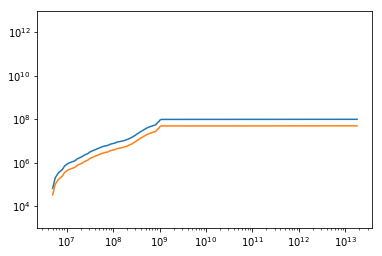

In [12]:
m2 = 0.05

x = getTInspiral(p, m2)
r = getRadius(p, True)
r = r[:-2]

plt.loglog(r, x)

m2 = 0.1
x = getTInspiral(p, m2)

plt.loglog(r, x)

plt.ylim(1e3, 1e13)